<center><font size = 8><b>Digital Image Processing</b></font></center><br/><br/>
<center><font size = 6><b>Assignment 1</b></font></center>

### Name: shahd mohamed abdelsalam
### ID: 2100898
### Email: 2100898@eng.asu.edu.eg

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# 1. Histogram Equalization

Histogram equalization is the process used to transfer the gray levels so that the histogram of the resulting image is equalized to be a constant (theoretically).
<font size="5"><p style="text-align: center;">$s_{k} = T(r_{k}) = \frac{L-1}{MN}\sum \limits _{j=1} ^{k}n_{j}$</p></font><br/>
<font size="3">where:<br/>s: is the output intensity<br/> k: is the intensity level contour = $ 0, 1, 2,....., L - 1$<br/>  L: total number of intensity levels<br/>  $n_{j}$: histogram result at intensity j (pixels number of intensity j)<br/>$MN$: is the image size</font><br/><br/>
<font size="3">*In this section, you will apply histogram equalization algorithm on a low-contrast image.*</font>

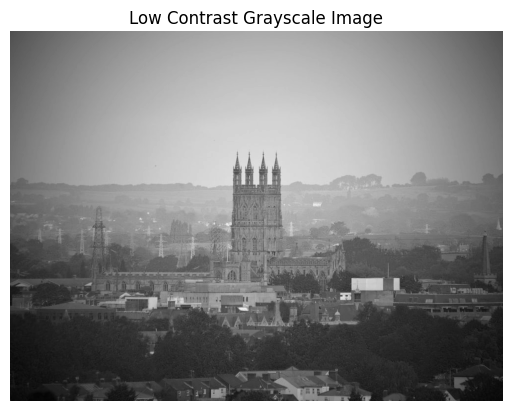

In [2]:
import cv2
import matplotlib.pyplot as plt

# Read the low contrast image
low_contrast = cv2.imread("low_contrast_image.jpg", cv2.IMREAD_GRAYSCALE)

# Function to display images
def show(input_image, colored=True):
    if colored:
        image_RGB = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
        plt.imshow(image_RGB)
    else:
        plt.imshow(input_image, cmap="gray")

# Display the low contrast grayscale image
show(low_contrast, colored=False)
plt.title("Low Contrast Grayscale Image")  # Adding a title for better clarity
plt.axis("off")  # Turn off the axis
plt.show()


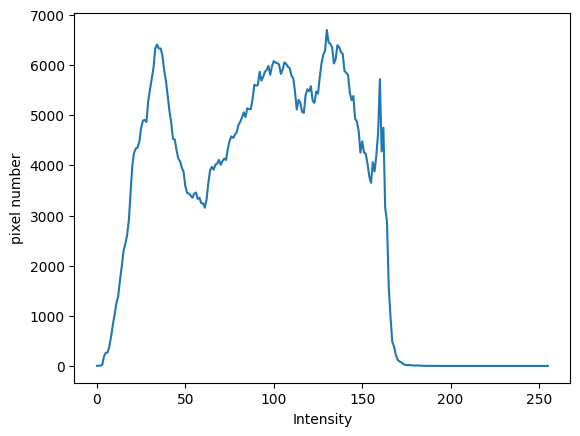

In [3]:
# TODO: Find the histogram of the image
gray_scale_histogram=cv2.calcHist(images=[low_contrast],channels=[0],mask=None,histSize=[256],ranges=[0,256])
# TODO: Plot the histogram with x-label: Intensity, y-label: Pixels number, title: Histogram of low contrast image
plt.plot(gray_scale_histogram)
plt.xlabel("Intensity")
plt.ylabel("pixel number")
plt.show()

In [4]:
# Convert the histogram array to 1D
h = gray_scale_histogram.ravel()
# Create a copy of the original image
equalized_image = np.copy(low_contrast)

# Initialize sum, L, M, N
sum = 0
L = h.shape[0]
M, N = low_contrast.shape

# Create an empty vector to hold the transformation function points
T = []


In [5]:
# TODO: Loop over 1D array of histogram to calculate s value of each k
# 1. Modify the sum
# 2. Compute s value
# 3. Round s to the nearest integer
# 4. Replace r intensities in the original image with the computed s intensity
# 5. Add a point (r,s) to the T vector
# Read the low contrast image
# Parameters
sum = np.sum(h)  # Total number of pixels in the image

# Loop over histogram bins (k is the intensity level)
cumulative_sum = 0
for k, r in enumerate(h):
    # 1. Modify the sum
    cumulative_sum += r

    # 2. Compute s value
    s = (cumulative_sum / sum) * 255  # Scale to intensity range 0-255

    # 3. Round s to the nearest integer
    s_rounded = int(round(s))

    # 4. Replace r intensities in the original image with the computed s intensity
    equalized_image[equalized_image == k] = s_rounded

    # 5. Add a point (r, s) to the T vector
    T.append((k, s_rounded))

# Print results
print("Updated Image:", equalized_image)
print("T Vector (r, s pairs):", T)



Updated Image: [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [ 26   0   2 ...   0   1   1]
 [255   0   2 ...   1   1   1]
 [255   0   3 ...   1   1   1]]
T Vector (r, s pairs): [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 1), (9, 1), (10, 1), (11, 2), (12, 2), (13, 3), (14, 3), (15, 4), (16, 5), (17, 6), (18, 7), (19, 8), (20, 9), (21, 11), (22, 12), (23, 14), (24, 15), (25, 17), (26, 19), (27, 20), (28, 22), (29, 24), (30, 26), (31, 27), (32, 29), (33, 32), (34, 34), (35, 36), (36, 38), (37, 40), (38, 42), (39, 44), (40, 46), (41, 48), (42, 49), (43, 51), (44, 52), (45, 54), (46, 55), (47, 57), (48, 58), (49, 59), (50, 61), (51, 62), (52, 63), (53, 64), (54, 65), (55, 66), (56, 68), (57, 69), (58, 70), (59, 71), (60, 72), (61, 73), (62, 74), (63, 75), (64, 77), (65, 78), (66, 79), (67, 81), (68, 82), (69, 84), (70, 85), (71, 86), (72, 88), (73, 89), (74, 91), (75, 92), (76, 94), (77, 95), (78, 97), (79, 98), 

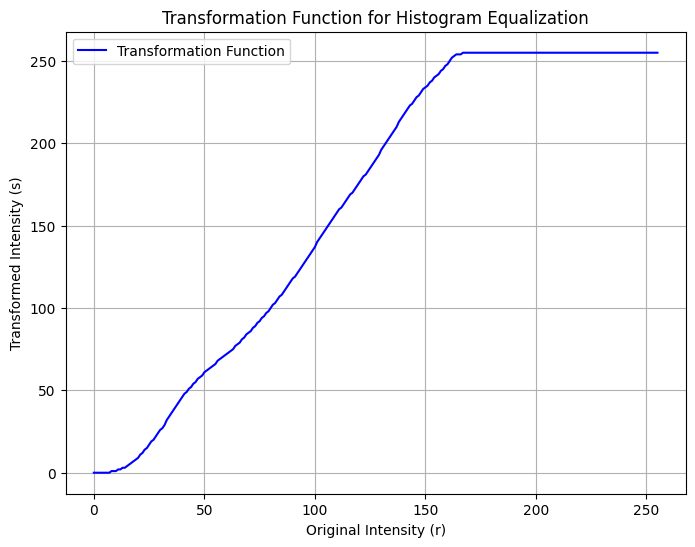

In [6]:
# TODO: Plot the transformation function
# Separate r and s values for plotting
r_values, s_values = zip(*T)

# Plot the transformation function
plt.figure(figsize=(8, 6))
plt.plot(r_values, s_values, color='blue', label='Transformation Function')
plt.title('Transformation Function for Histogram Equalization')
plt.xlabel('Original Intensity (r)')
plt.ylabel('Transformed Intensity (s)')
plt.grid(True)
plt.legend()
plt.show()

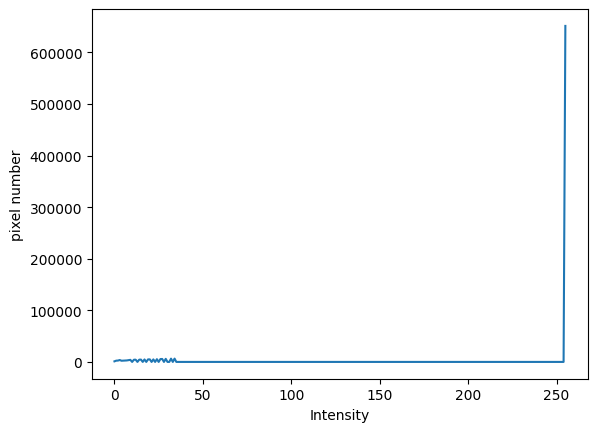

In [7]:
# TODO: Plot the histogram after equalization
gray_scale_histogram_equalized=cv2.calcHist(images=[equalized_image],channels=[0],mask=None,histSize=[256],ranges=[0,256])
# TODO: Plot the histogram with x-label: Intensity, y-label: Pixels number, title: Histogram of low contrast image
plt.plot(gray_scale_histogram_equalized)
plt.xlabel("Intensity")
plt.ylabel("pixel number")
plt.show()



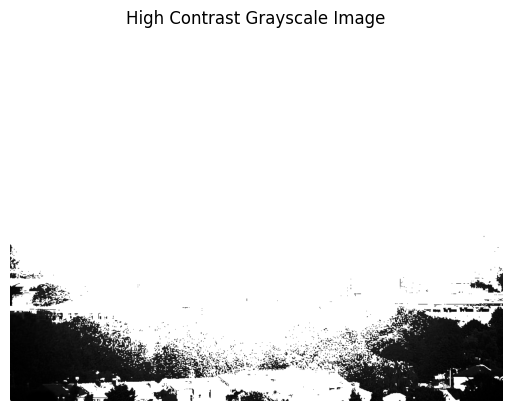

In [8]:
# TODO: Display the low contrast and the new equalized images using plt
# Display the low contrast grayscale image
show(equalized_image, colored=False)
plt.title("High Contrast Grayscale Image")  # Adding a title for better clarity
plt.axis("off")  # Turn off the axis
plt.show()

# 2. Medical Imaging

Image processing has become a cornerstone in the medical field improving the way healthcare professionals diagnose and treat patients. By leveraging advanced algorithms and imaging techniques, medical image processing allows for detailed, non-invasive exploration exploration of the human body.<br/><br/>
One of the key benefits of medical image processing is its ability to enhance the clarity and detail of medical images.<br/>In this section, you will apply some image enhancement techniques to improve the quality of a medical image.

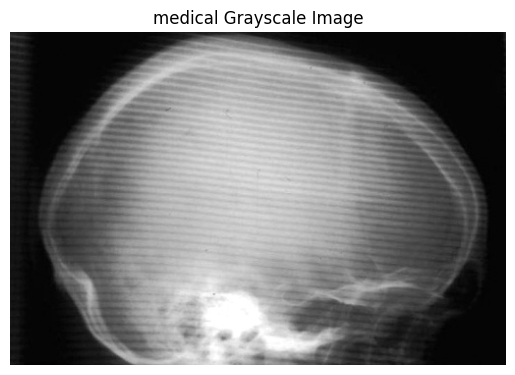

In [9]:
# Read the medical image
medical_image = cv2.imread("medical.png", cv2.IMREAD_GRAYSCALE)
# TODO: Create a pipeline to enhance the quality of the medical image
#       Support your answer with various useful plots
## first plot the original image 
# Display the medical grayscale image
show(medical_image, colored=False)
plt.title("medical Grayscale Image")  # Adding a title for better clarity
plt.axis("off")  # Turn off the axis
plt.show()




In [11]:
#enhance the quality of the image 
## create some useful functions 
print(medical_image.shape)
def DFT(image):
    fft_image=cv2.dft(src=np.float32(image),flags=cv2.DFT_COMPLEX_OUTPUT)
    #to shift the output
    shifted_fft=np.fft.fftshift(fft_image)
    return shifted_fft
shifted_fft=DFT(medical_image)
print(shifted_fft.shape)
    

(339, 505)
(339, 505, 2)


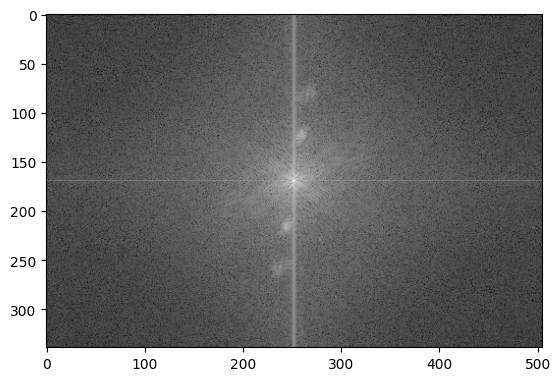

In [12]:
def display_dft(shifted_fft):
    magnitude_sepectrum=np.log(1+cv2.magnitude(shifted_fft[:,:,0],shifted_fft[:,:,1]))
    normalized_magnitude=cv2.normalize(magnitude_sepectrum,None,0,255,cv2.NORM_MINMAX,cv2.CV_8U)
    return normalized_magnitude

normalized_fft=display_dft(shifted_fft)
plt.imshow(normalized_fft,cmap="gray")

(339, 505, 2)


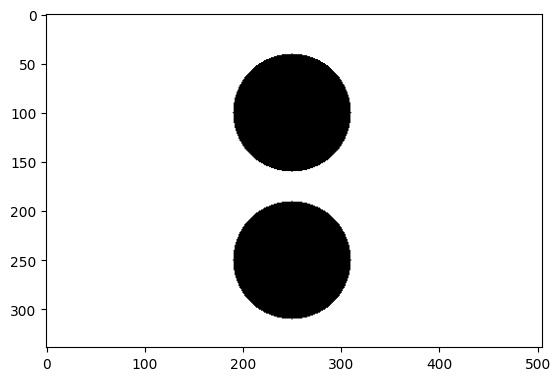

In [ ]:
##apply the filter for enhancement of the image 
# Create an ideal LPF
rows = shifted_fft.shape[0]
cols = shifted_fft.shape[1]
temp = np.zeros(shape=shifted_fft.shape, dtype=np.uint8)
print(temp.shape)
cv2.circle(img=temp, center=(250, 250), radius= 70, color=(1,1), thickness=-1) # Negative thickness value means that it is filled
cv2.circle(img=temp, center=(250, 100), radius= 70, color=(1,1), thickness=-1) # Negative thickness value means that it is filled
hpf = 1-temp                          # for hpf, try 1 - temp
plt.imshow(hpf[:,:,0] * 255, cmap="gray")

In [37]:
# Apply the filter to the image
shifted_filtered_fft = hpf * shifted_fft

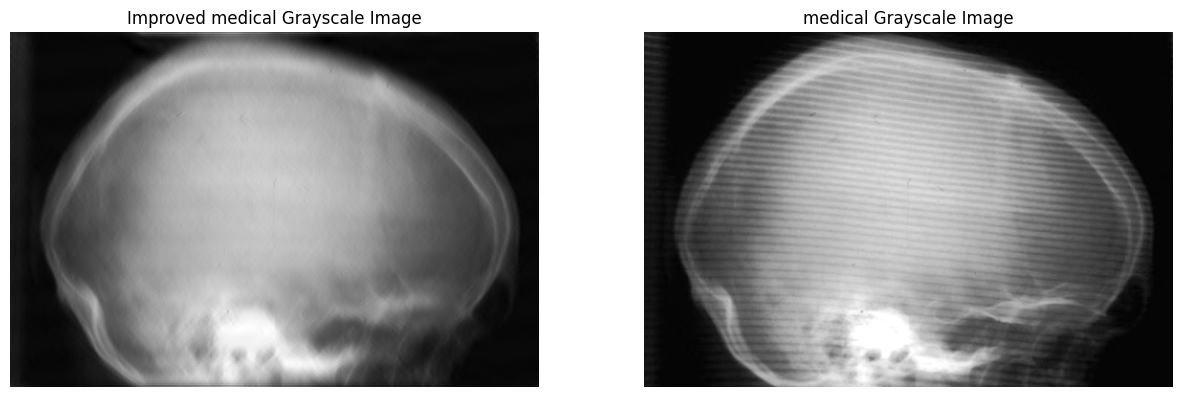

In [42]:
# Compute the inverse DFT of the filtered image and display it
def IDFT(shifted_fft):
    # Get the image back using inverse DFT
    unshifted_ifft = np.fft.ifftshift(shifted_fft)
    idft_image = cv2.idft(src=unshifted_ifft)
    restored_image = cv2.magnitude(idft_image[:, :, 0], idft_image[:, :, 1])
    # Normalize the image to range from 0 to 255 before displaying it
    restored_image = cv2.normalize(restored_image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    return restored_image
plt.subplots(1, 2, figsize=(15, 15))
restored_image = IDFT(shifted_filtered_fft)
plt.subplot(1,2,1)
plt.imshow(restored_image, cmap="gray")
plt.title("Improved medical Grayscale Image")  # Adding a title for better clarity
plt.axis("off")  # Turn off the axis
plt.subplot(1,2,2)
show(medical_image, colored=False)
plt.title("medical Grayscale Image")  # Adding a title for better clarity
plt.axis("off")  # Turn off the axis
plt.show()